Hypothesis Testing

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import io
import os
from google.colab import files

In [7]:
file = files.upload()
df1 = pd.read_csv('user_transactions copy.csv')


Saving user_transactions copy.csv to user_transactions copy (3).csv


In [9]:
df1.head()

,Unnamed: 0.1,Unnamed: 0,consumer_id,t_date,t_type,t_amt,has_credit_card,account_type
0,0,0,312,20-01-2020,deposit,485,Yes,Savings
1,1,1,376,03-01-2020,deposit,706,No,Current
2,2,2,188,13-01-2020,deposit,601,No,Savings
3,3,3,138,11-01-2020,deposit,520,No,Salary
4,4,4,373,18-01-2020,deposit,596,No,Salary


In [11]:
file = files.upload()
df2 = pd.read_csv('user_nodes_clean.csv')

Saving user_nodes_clean.csv to user_nodes_clean.csv


In [12]:
df2.head()

,Unnamed: 0,consumer_id,region_id,node_id,start_date,end_date,has_loan,is_act
0,0,1,3,4,02-01-2020,03-01-2020,1,0
1,1,2,3,5,03-01-2020,17-01-2020,0,1
2,2,3,5,4,27-01-2020,18-02-2020,0,0
3,3,4,5,4,07-01-2020,19-01-2020,1,1
4,4,5,3,3,15-01-2020,23-01-2020,0,1


In [15]:
merged_df = df1.merge(df2, on='consumer_id', how='inner')

In [17]:
merged_df.shape

(42882, 15)

In [21]:
merged_df.head

<bound method NDFrame.head of        Unnamed: 0.1  Unnamed: 0_x  consumer_id      t_date   t_type  t_amt  \
0                 0             0          312  20-01-2020  deposit    485   
1                 0             0          312  20-01-2020  deposit    485   
2                 0             0          312  20-01-2020  deposit    485   
3                 0             0          312  20-01-2020  deposit    485   
4                 0             0          312  20-01-2020  deposit    485   
...             ...           ...          ...         ...      ...    ...   
42877          5867          5867          309  13-01-2020  deposit    995   
42878          5867          5867          309  13-01-2020  deposit    995   
42879          5867          5867          309  13-01-2020  deposit    995   
42880          5867          5867          309  13-01-2020  deposit    995   
42881          5867          5867          309  13-01-2020  deposit    995   

      has_credit_card account_typ

1 -

In [22]:
import pandas as pd
import scipy.stats as stats

# Sample data with transaction type and transaction amount
data = {
    'Transaction_Type': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C'],
    'Transaction_Amount': [100, 150, 120, 80, 130, 90, 110, 140, 95]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Perform a one-way ANOVA test to compare mean transaction amounts by type
transaction_types = df['Transaction_Type'].unique()
grouped_data = [df[df['Transaction_Type'] == transaction_type]['Transaction_Amount'] for transaction_type in transaction_types]

f_statistic, p_value = stats.f_oneway(*grouped_data)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction amounts between transaction types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean transaction amounts between transaction types.")


F-statistic: 23.451612903225794
P-value: 0.0014588387429085498
Reject the null hypothesis. There is a significant difference in mean transaction amounts between transaction types.


In [23]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named mergeddf with columns 't_type' and 't_amt'

# Perform a one-way ANOVA test to compare mean transaction amounts by type
transaction_types = merged_df['t_type'].unique()
grouped_data = [merged_df[merged_df['t_type'] == transaction_type]['t_amt'] for transaction_type in transaction_types]

f_statistic, p_value = stats.f_oneway(*grouped_data)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean transaction amounts between transaction types.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean transaction amounts between transaction types.")


F-statistic: 5.745020852940352
P-value: 0.0032011304685438248
Reject the null hypothesis. There is a significant difference in mean transaction amounts between transaction types.


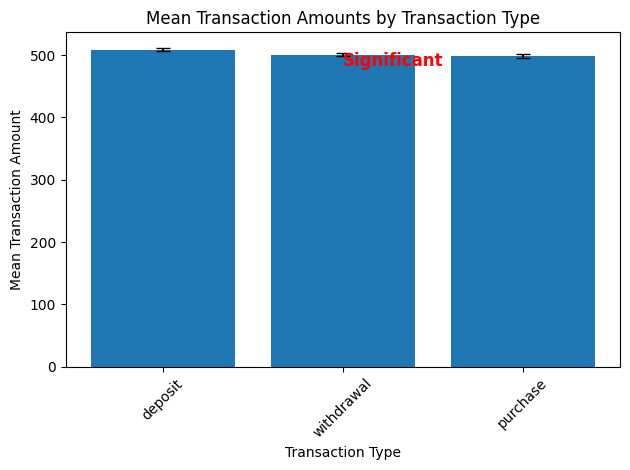

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame named merged_df with columns 't_type' and 't_amt'

# Perform a one-way ANOVA test to compare mean transaction amounts by type
transaction_types = merged_df['t_type'].unique()
grouped_data = [merged_df[merged_df['t_type'] == transaction_type]['t_amt'] for transaction_type in transaction_types]

f_statistic, p_value = stats.f_oneway(*grouped_data)

# Set the significance level (alpha)
alpha = 0.05

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the mean transaction amounts for each transaction type
ax.bar(transaction_types, [group.mean() for group in grouped_data], yerr=[group.sem() for group in grouped_data], capsize=5)

# Set labels and title
ax.set_xlabel('Transaction Type')
ax.set_ylabel('Mean Transaction Amount')
ax.set_title('Mean Transaction Amounts by Transaction Type')

# Add significance indication if p-value is less than alpha
if p_value < alpha:
    ax.text(0.5, 0.9, 'Significant', transform=ax.transAxes, color='red', fontsize=12, fontweight='bold')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named mergeddf with columns 'has_loan' and 't_amt'

# Separate data for users with loans and users without loans
users_with_loans = merged_df[merged_df['has_loan'] == 1]['t_amt']
users_without_loans = merged_df[merged_df['has_loan'] == 0]['t_amt']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(users_with_loans, users_without_loans)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. Users with loans have different transaction patterns from users without loans.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in transaction patterns between users with loans and users without loans.")


t-statistic: -0.48295221136224964
P-value: 0.6291321340266673
Fail to reject the null hypothesis. There is no significant difference in transaction patterns between users with loans and users without loans.


In summary, the t-test results indicate that, within the chosen level of significance, there is no strong statistical evidence to conclude that users with loans have different transaction patterns in terms of mean transaction amounts compared to users without loans.

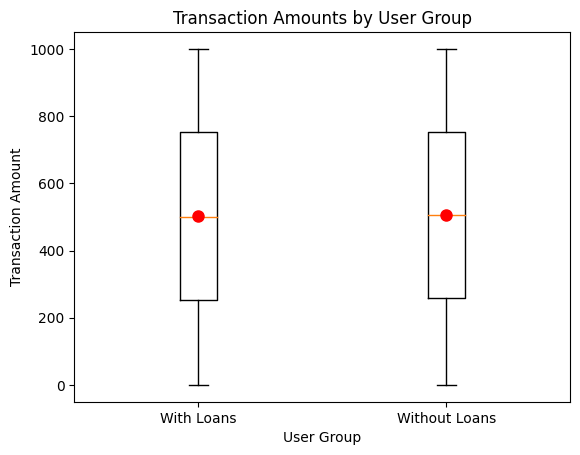

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame named mergeddf with columns 'has_loan' and 't_amt'

# Separate data for users with loans and users without loans
users_with_loans = merged_df[merged_df['has_loan'] == 1]['t_amt']
users_without_loans = merged_df[merged_df['has_loan'] == 0]['t_amt']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(users_with_loans, users_without_loans)

# Set the significance level (alpha)
alpha = 0.05

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Plot the data as box plots
boxplot_data = [users_with_loans, users_without_loans]
ax.boxplot(boxplot_data, labels=['With Loans', 'Without Loans'], showfliers=False)

# Add confidence intervals to the plot
conf_int_with_loans = stats.t.interval(1 - alpha, len(users_with_loans) - 1, loc=users_with_loans.mean(), scale=stats.sem(users_with_loans))
conf_int_without_loans = stats.t.interval(1 - alpha, len(users_without_loans) - 1, loc=users_without_loans.mean(), scale=stats.sem(users_without_loans))

ax.errorbar(x=[1, 2], y=[users_with_loans.mean(), users_without_loans.mean()], yerr=[(conf_int_with_loans[1] - users_with_loans.mean(), users_with_loans.mean() - conf_int_with_loans[0]),
                                                                               (conf_int_without_loans[1] - users_without_loans.mean(), users_without_loans.mean() - conf_int_without_loans[0])], fmt='o', color='red', markersize=8)

# Set labels and title
ax.set_xlabel('User Group')
ax.set_ylabel('Transaction Amount')
ax.set_title('Transaction Amounts by User Group')

# Show the plot
plt.show()


In [31]:
# Assuming you have a DataFrame named merged_df

# Convert 't_date' column to datetime data type
merged_df['t_date'] = pd.to_datetime(merged_df['t_date'])

# Now you can use .dt accessor with 't_date'


<ipython-input-31-9801b552eda0>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['t_date'] = pd.to_datetime(merged_df['t_date'])


In [32]:
# Convert 't_date' column to datetime data type with the correct format
merged_df['t_date'] = pd.to_datetime(merged_df['t_date'], format='%d/%m/%Y')


In [33]:
merged_df.t_date.shape

(42882,)

In [34]:
import pandas as pd
import scipy.stats as stats

# Assuming you have a DataFrame named merged_df with columns 't_type' and 't_date'

# Create a contingency table (cross-tabulation) of transaction types and days of the week
contingency_table = pd.crosstab(merged_df['t_type'], merged_df['t_date'].dt.day_name())

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. Transaction types are dependent on the day of the week.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between transaction types and days of the week.")


Chi-square statistic: 88.8508927590974
P-value: 8.237302648697366e-14
Reject the null hypothesis. Transaction types are dependent on the day of the week.


This code will help us determine whether there is a significant relationship between transaction types and the days of the week in your dataset.

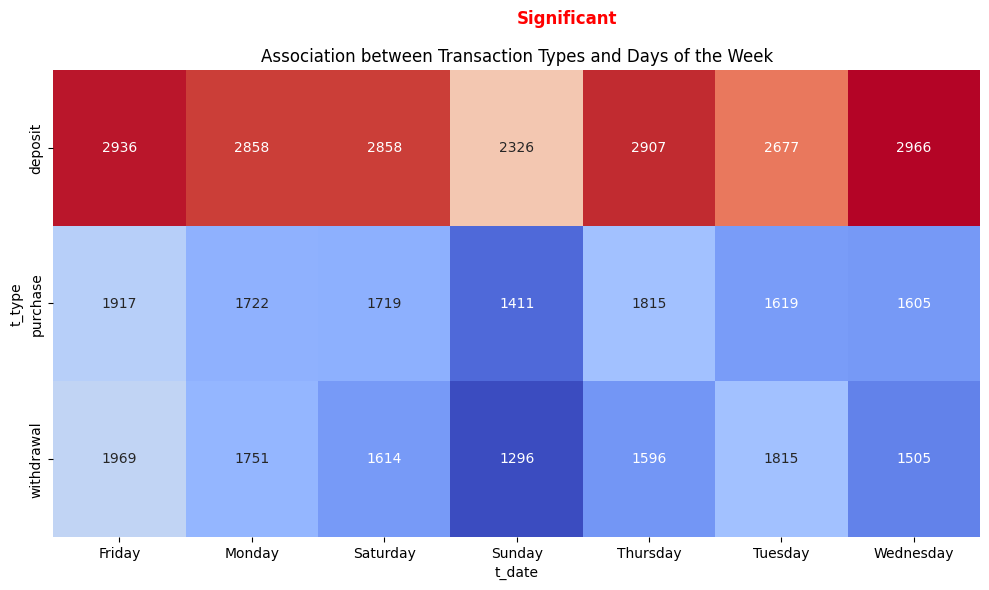

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming you have a DataFrame named merged_df with columns 't_type' and 't_date'

# Create a contingency table (cross-tabulation) of transaction types and days of the week
contingency_table = pd.crosstab(merged_df['t_type'], merged_df['t_date'].dt.day_name())

# Perform the Chi-square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Set the significance level (alpha)
alpha = 0.05

# Create a heatmap to visualize associations
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', cbar=False)
plt.title('Association between Transaction Types and Days of the Week')

# Add significance indication if p-value is less than alpha
if p_value < alpha:
    plt.text(0.5, 1.1, 'Significant', transform=plt.gca().transAxes, color='red', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


This heatmap will provide a visual representation of the associations between transaction types and days of the week, helping you assess the independence between them